# **GELAR RASA DATA SCIENCE COMPETITION 📊**



**TIM:** Mendadak dan Mendidik


## **BAGIAN 🅰️**

> - Sales ID (menunjukkan faktur penjualan tertentu)
- Customer ID (menunjukkan siapa pelanggan yang melakukan pembelian, dengan
total 4 pelanggan)
- SalesRep ID (menunjukkan perwakilan penjualan yang melakukan penjualan, dengan
8 perwakilan berbeda)
- Product ID (menunjukkan produk spesifik yang dijual, dengan total 6 produk
berbeda)
- Sales Quantity (jumlah produk yang dibeli dari setiap penjualan, dalam ton)
- Sales Amount (nilai moneter setiap penjualan, dalam US$)
- Date (tanggal faktur penjualan, Tahun, Bulan, Hari)




### **Tugas 1**

#### **DATA CLEANING**

In [ ]:
#import
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#memasukan data
file_path = 'sales.xlsx'

sada_sheet = 'SalesData'
cust_sheet = 'Customer'
prod_sheet = 'Product'
sare_sheet = 'SalesRep'
df_sada = pd.read_excel(file_path, sheet_name=sada_sheet)
df_cust = pd.read_excel(file_path, sheet_name=cust_sheet)
df_prod = pd.read_excel(file_path, sheet_name=prod_sheet)
df_sare = pd.read_excel(file_path, sheet_name=sare_sheet)

In [ ]:
#cek data duplikat
df_sada.duplicated().sum()

0

In [ ]:
#cek missing
df_sada.isnull().sum()

,0
SalesID,0
CustomerID,0
SalesRepID,0
ProductID,0
Sales Quantity (in tons),0
Sales Amount (in US$),0
Year,0
Month,0
Day,0


**A. Hitung total penjualan tahunan untuk setiap produk selama periode tertentu.**


In [ ]:
#menggabungkan data sales dengan data product
annual_sales_with_name = pd.merge(df_sada, df_prod[['ProductID', 'Product Name']], on='ProductID', how='inner')

#Grouping berdasarkan nama produk dengan jumlah penjualan
annual_sales = annual_sales_with_name.groupby(['ProductID', 'Product Name', 'Year'])['Sales Amount (in US$)'].sum().reset_index()

annual_sales


,ProductID,Product Name,Year,Sales Amount (in US$)
0,F3030,Nitrogen-rich,2021,998400.0
1,F3030,Nitrogen-rich,2022,605800.0
2,F3030,Nitrogen-rich,2023,981500.0
3,F3031,Potassium-rich,2021,639000.0
4,F3031,Potassium-rich,2022,725000.0
5,F3031,Potassium-rich,2023,735000.0
6,F3032,Phosporus-rich,2021,499800.0
7,F3032,Phosporus-rich,2022,310800.0
8,F3032,Phosporus-rich,2023,513800.0
9,S2020,Corn,2021,1965000.0


**B. Tentukan rata-rata penjualan per pelanggan berdasarkan karakteristiknya**

In [ ]:
df_cust_size = df_cust[['CustomerID','CustomerType','Size']]
df_cust_Loc = df_cust[['CustomerID','CustomerType','Location']]
df_cust_Subsize = df_cust[['CustomerID','CustomerType','Subsidized']]


merged_size = pd.merge(df_sada, df_cust_size, on='CustomerID', how='inner')
merged_loc = pd.merge(df_sada, df_cust_Loc, on='CustomerID', how='inner')
merged_Subsize = pd.merge(df_sada, df_cust_Subsize, on='CustomerID', how='inner')

result_size = merged_size.groupby(['CustomerID','CustomerType', 'Size'])['Sales Amount (in US$)'].mean().reset_index()
result_loc = merged_loc.groupby(['CustomerID','CustomerType', 'Location'])['Sales Amount (in US$)'].mean().reset_index()
result_subsize = merged_Subsize.groupby(['CustomerID','CustomerType', 'Subsidized'])['Sales Amount (in US$)'].mean().reset_index()

In [ ]:
result_size

,CustomerID,CustomerType,Size,Sales Amount (in US$)
0,F034,Farm,Big,26089.272031
1,R012,Retailer,Big,25196.265560
2,R056,Retailer,Medium,8352.290076
3,R078,Farm,Medium,7541.276596


In [ ]:
result_loc

,CustomerID,CustomerType,Location,Sales Amount (in US$)
0,F034,Farm,Illinois,26089.272031
1,R012,Retailer,Iowa,25196.265560
2,R056,Retailer,Indiana,8352.290076
3,R078,Farm,Nebraska,7541.276596


In [ ]:
result_subsize

,CustomerID,CustomerType,Subsidized,Sales Amount (in US$)
0,F034,Farm,No,26089.272031
1,R012,Retailer,No,25196.265560
2,R056,Retailer,No,8352.290076
3,R078,Farm,Yes,7541.276596


**C. Identifikasi 3 perwakilan penjualan teratas berdasarkan total penjualan**


In [ ]:
df_sada_sare = pd.merge(df_sada,df_sare[['SalesRepID','Firstnames','Surnames','Tenure','Gender','Certified Crop Adviser (CCA)','Certified Professional Agronomist (CPA)']], on='SalesRepID', how='inner')
df_total_sales_sada_sare = df_sada_sare.groupby(['SalesRepID','Firstnames','Surnames'])['Sales Amount (in US$)'].sum().reset_index()

df_total_sales_sada_sare['Fullname'] = df_total_sales_sada_sare["Firstnames"] + ' ' + df_total_sales_sada_sare["Surnames"] #optional
df_top_3_best_sales = df_total_sales_sada_sare.sort_values(by='Sales Amount (in US$)', ascending=False).head(3)
df_top_3_best_sales.reset_index(drop=True)

,SalesRepID,Firstnames,Surnames,Sales Amount (in US$),Fullname
0,BC1984,Cody,Clark,3585400.0,Cody Clark
1,AA1986,Alex,Adams,3522300.0,Alex Adams
2,DD1988,Drew,Davis,3223900.0,Drew Davis


### **Tugas 2**

**A Total penjualan untuk setiap produk yang disegmentasi berdasarkan jenis pelanggan.**

In [ ]:
df_cust_sub = df_cust[['CustomerID','CustomerType']]
df_prod_sub = df_prod[['ProductID','Product Name']]

merged_df = pd.merge(df_sada, df_cust_sub, on='CustomerID', how='inner')
merged_all = pd.merge(merged_df, df_prod_sub, on='ProductID', how='inner')

result_segmented_sales = merged_all.groupby(['Product Name', 'CustomerType'])['Sales Amount (in US$)'].sum().reset_index()
result_segmented_sales

,Product Name,CustomerType,Sales Amount (in US$)
0,Corn,Farm,2907000.0
1,Corn,Retailer,2625000.0
2,Nitrogen-rich,Farm,1504100.0
3,Nitrogen-rich,Retailer,1081600.0
4,Phosporus-rich,Farm,638400.0
5,Phosporus-rich,Retailer,686000.0
6,Potassium-rich,Farm,988000.0
7,Potassium-rich,Retailer,1111000.0
8,Soybeans,Farm,1588000.0
9,Soybeans,Retailer,1764000.0


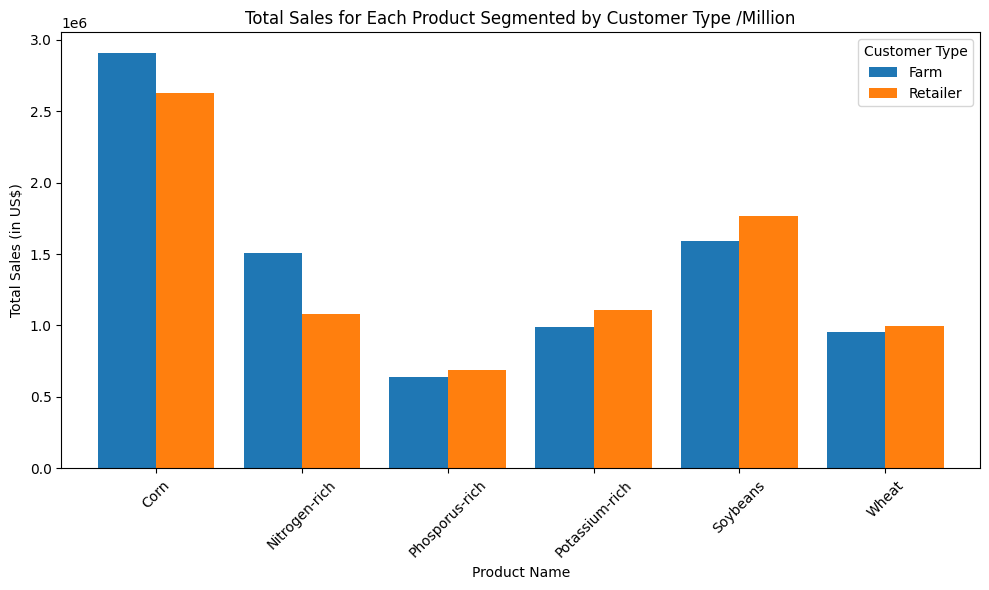

In [ ]:
# Membuat pivot bagi agar memberikan kontrol lebih baik untuk bar plotting
pivot_data = result_segmented_sales.pivot(index='Product Name', columns='CustomerType', values='Sales Amount (in US$)')

# Membuat diagram batang berdampingan untuk setiap produk berdasarkan jenis pelanggan
pivot_data.plot(kind='bar', figsize=(10, 6), width=0.8)

# Mengatur label dan judul grafik
plt.xlabel('Product Name')
plt.ylabel('Total Sales (in US$)')
plt.title('Total Sales for Each Product Segmented by Customer Type /Million')
plt.legend(title='Customer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**B. Proporsi total penjualan menurut jenis pelanggan untuk setiap bulan dalam setahun. Visualisasi ini harus menyoroti tren musiman penjualan di seluruh jenis pelanggan.**

In [ ]:
#Tentukan urutan yang benar untuk nama bulan singkatan
month_order = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

# Mengelompokkan penjualan bulanan berdasarkan jenis pelanggan
monthly_sales = pd.merge(df_sada, df_cust_sub, on='CustomerID', how='inner')
monthly_sales = monthly_sales.groupby(['Month', 'CustomerType'])['Sales Amount (in US$)'].sum().unstack(fill_value=0)

# Ubah kolom 'Month' menjadi kategori dengan urutan yang benar untuk nama bulan singkatan
monthly_sales.index = pd.Categorical(monthly_sales.index, categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_index()

# Ulangi proses yang sama untuk `monthly_sales_percentage`
monthly_sales_percentage.index = pd.Categorical(monthly_sales_percentage.index, categories=month_order, ordered=True)
monthly_sales_percentage = monthly_sales_percentage.sort_index()

#membandingkan nilai asli sales values dan percentages dari kedua customer type
monthly_sales_combined = monthly_sales.copy()
for customer_type in monthly_sales.columns:
    monthly_sales_combined[f'{customer_type} (%)'] = monthly_sales_percentage[customer_type]

monthly_sales_combined

CustomerType,Farm,Retailer,Farm (%),Retailer (%)
Jan,555900.0,618100.0,47.350937,52.649063
Feb,596600.0,774400.0,43.515682,56.484318
Mar,786300.0,892600.0,46.834237,53.165763
Apr,2583000.0,1987300.0,56.517078,43.482922
May,513400.0,647400.0,44.228119,55.771881
Jun,457900.0,493100.0,48.149317,51.850683
Jul,822200.0,696300.0,54.145538,45.854462
Aug,457000.0,561600.0,44.865502,55.134498
Sep,481900.0,368100.0,56.694118,43.305882
Oct,515500.0,538100.0,48.927487,51.072513


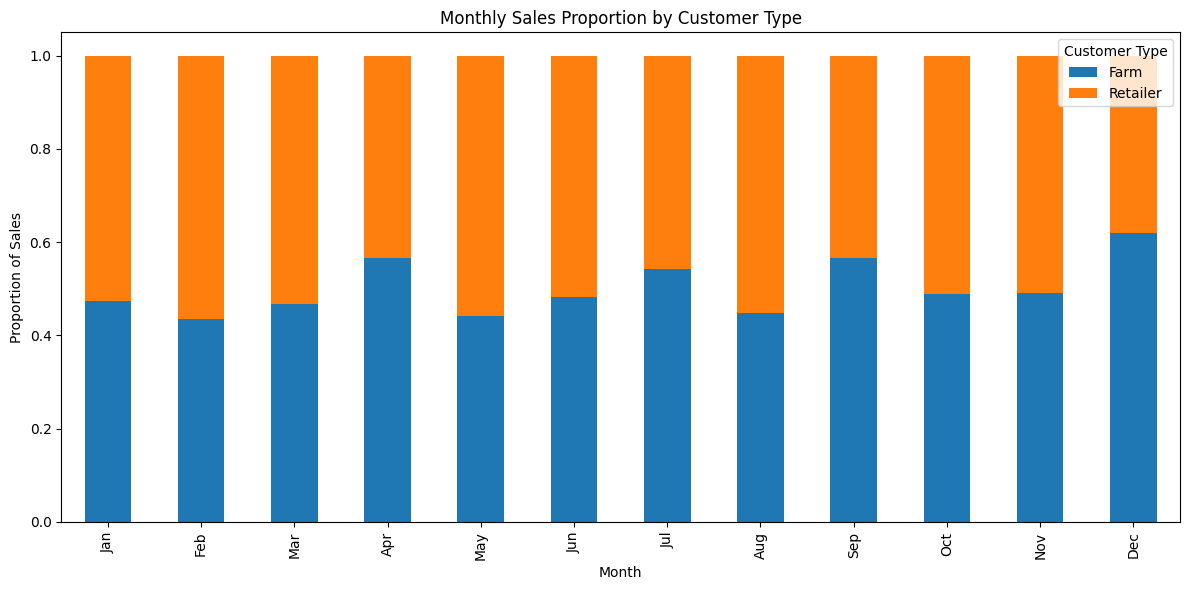

In [ ]:
# Menghitung proporsi penjualan berdasarkan jenis pelanggan per bulan
monthly_sales_proportion = monthly_sales.div(monthly_sales.sum(axis=1), axis=0)

# Membuat grafik proporsi total penjualan berdasarkan jenis pelanggan untuk setiap bulan
monthly_sales_proportion.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Proportion of Sales')
plt.title('Monthly Sales Proportion by Customer Type')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

**C. Kinerja penjualan dari tiga perwakilan penjualan teratas selama periode
pelaporan tiga tahun. Sertakan penanda untuk perubahan atau peristiwa signifikan yang mungkin berdampak pada kinerja penjualan mereka.**

<ipython-input-31-8378f8112fb0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_sales_data['Month'] = top_3_sales_data['Date'].dt.to_period('M')


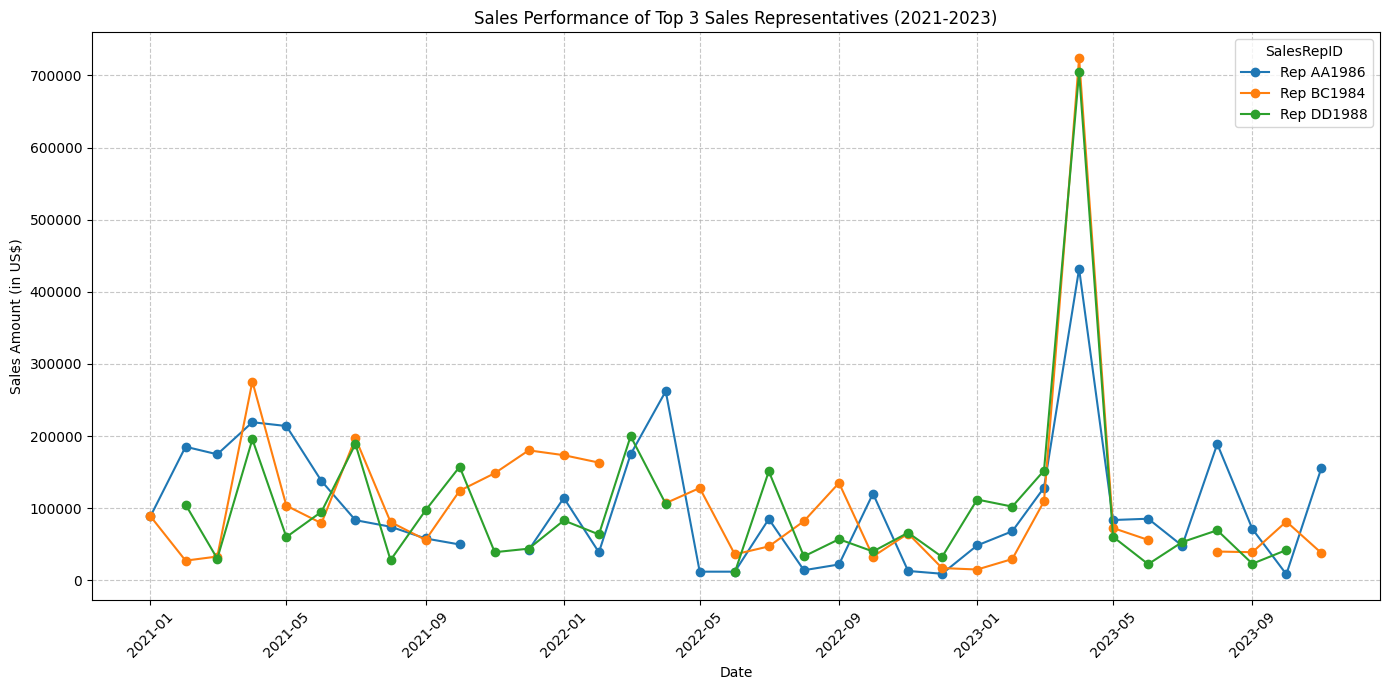

In [ ]:
# Filter data untuk tahun 2021-2023
recent_sales = df_sada[df_sada['Year'].isin([2021, 2022, 2023])]

# Memetakan nama bulan singkatan ke nama lengkap
month_mapping = {
    'Jan': 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April',
    'May': 'May', 'Jun': 'June', 'Jul': 'July', 'Aug': 'August',
    'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'
}
recent_sales['FullMonth'] = recent_sales['Month'].map(month_mapping)
recent_sales['Date'] = pd.to_datetime(recent_sales['Year'].astype(str) + '-' +
                                      recent_sales['FullMonth'] + '-' +
                                      recent_sales['Day'].astype(str))

# Identifikasi 3 perwakilan teratas berdasarkan total penjualan
total_sales_per_rep = recent_sales.groupby('SalesRepID')['Sales Amount (in US$)'].sum().nlargest(3)
top_3_reps = total_sales_per_rep.index
top_3_sales_data = recent_sales[recent_sales['SalesRepID'].isin(top_3_reps)]

# Mengonversi data ke dalam bentuk bulanan
top_3_sales_data['Month'] = top_3_sales_data['Date'].dt.to_period('M')
monthly_sales = top_3_sales_data.groupby(['Month', 'SalesRepID'])['Sales Amount (in US$)'].sum().unstack()

# Memplot data penjualan dengan agregasi bulanan
plt.figure(figsize=(14, 7))
for rep_id in monthly_sales.columns:
    plt.plot(monthly_sales.index.to_timestamp(), monthly_sales[rep_id], marker='o', label=f"Rep {rep_id}")

# Menyempurnakan tampilan plot
plt.title("Sales Performance of Top 3 Sales Representatives (2021-2023)")
plt.xlabel("Date")
plt.ylabel("Sales Amount (in US$)")
plt.legend(title="SalesRepID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Grafik ini adalah plot line chart yang menunjukkan performa penjualan dari tiga perwakilan penjualan teratas selama periode tiga tahun (2021-2023). Garis yang terputus menandakan bahwa perwakilan penjualan tidak menjual produk. Pada April 2023 terjadi kenaikan paling tinggi selama periode tiga tahun (2021-2023).

### **Tugas 3**

Ketika kita melihat data penjualan, beberapa wawasan utama muncul yang menginformasikan strategi potensial di masa mendatang seputar penjualan benih dan pupuk.

1. **Kinerja Produk**:
   - Berdasarkan deskriptif total penjualan tahunan. Beberapa produk unggul secara konsisten dalam hal pendapatan, menunjukkan preferensi pelanggan yang jelas. Hal ini mungkin juga mencerminkan pola permintaan musiman.
   
2. **Segmentasi Pelanggan**:
- Berdasarkan tabel deskriptif rata-rata penjualan perpelanggan:
   - **Pelanggan Bisnis Besar**: Bisnis pertanian besar mendominasi penjualan melalui beberapa pembelian dalam jumlah besar.
   - **Pelanggan Kecil dan Bersubsidi**: Pelanggan ini lebih fokus pada produk spesifik, menunjukkan kebutuhan akan pendekatan pemasaran yang lebih disesuaikan untuk memenuhi preferensi unik dari masing-masing segmen.

3. **Pengaruh Sertifikasi pada Penjualan**:
   - Berdasarkan performa penjualan 3 Perwakilan dengan sertifikasi seperti **Certified Crop Advisor (CCA)** atau **Certified Professional Agronomist** secara konsisten mencapai penjualan yang lebih tinggi. Sertifikasi meningkatkan kredibilitas di mata pelanggan, menunjukkan bahwa investasi dalam pelatihan dapat memberikan ROI yang baik.

**Strategi**

- **Pemasaran Tertarget**: Mengembangkan kampanye pemasaran yang disesuaikan untuk segmen bisnis besar dan pelanggan kecil.
- **Peningkatan Pelatihan**: Meningkatkan pelatihan dan akses ke sumber daya bagi tim penjualan, termasuk sertifikasi profesional, untuk meningkatkan kepercayaan pelanggan.
- **Pemanfaatan Tenaga Penjualan Terbaik**: Mendorong tenaga penjualan terbaik untuk berperan sebagai mentor dan membimbing tim, sehingga dapat memperkuat pengetahuan kolektif dan efektivitas tim penjualan.


## **BAGIAN 🅱️**
>Perusahaan Anda, Loans 'R Us, adalah pemimpin dalam industri kartu kredit dan pinjaman
yang dipercaya oleh pelanggan di seluruh dunia. Meskipun kinerja perusahaan baik, Anda
merasa perusahaan dapat berbuat lebih baik dengan mengurangi jumlah penipuan kartu kredit
yang meningkat akhir-akhir ini. Salah satu karyawan Anda menyarankan agar Anda
memanfaatkan kekuatan analisis data dan menganalisis data yang Anda miliki di database.
Beberapa pertanyaan/kekhawatiran yang ingin Anda temukan jawabannya:

#### **PEMBERSIAN DATA**

In [ ]:
#import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
#baca data
df = pd.read_excel("fraud.xlsx")

In [ ]:
#cek missing value
df.isnull().sum()

,0
trans_date_trans_time,0
merchant,0
category,0
amt,0
city,0
state,0
lat,0
long,0
city_pop,0
job,0


In [ ]:
#menghapus duplikat
df.duplicated().sum()
df = df.drop_duplicates()

In [ ]:
#cek tipe data
df.dtypes

,0
trans_date_trans_time,object
merchant,object
category,object
amt,float64
city,object
state,object
lat,float64
long,float64
city_pop,int64
job,object


In [ ]:
#Mengubah data type menjadi datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [ ]:
#Drop baris dalam kolom 'is_fraud' selain 1 dan 0
idx = df[(df['is_fraud'] != 1) & (df['is_fraud'] != 0)].index.tolist()
df = df.drop(index=idx)

#### **No. 1**

>Buat model untuk memprediksi jumlah tagihan kartu kredit menggunakan variabel di
dalam kumpulan data. Anda bebas menggunakan variabel apa pun yang tersedia di
dataset (kami sarankan menggunakan data numerik). Apakah Anda mampu membuat
model yang akurat dan andal? Variabel manakah yang (atau tidak) relevan dalam
memprediksi jumlah tagihan kartu kredit?

Mean Squared Error (MSE): 1406.5246464048728
Mean Absolute Error (MAE): 2.731539869242175
Root Mean Squared Error (RMSE): 37.50366177328386
Feature Importance:
       Feature  Importance
0         amt    0.951248
2        long    0.013819
5  merch_long    0.010635
1         lat    0.010477
3    city_pop    0.009177
4   merch_lat    0.004645


<Figure size 800x600 with 0 Axes>

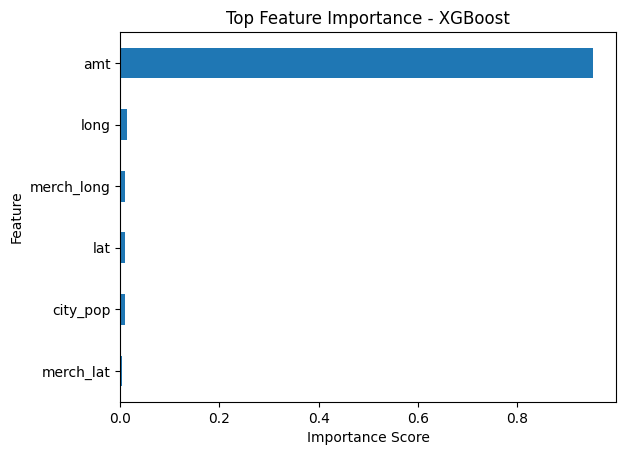

In [ ]:
# Tentukan fitur dan target (misalkan 'amt' adalah variabel target untuk jumlah)
features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
X = df[features]
y = df['amt']

# Pisahkan dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tentukan dan latih model XGBRegressor
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.2, random_state=42)
xgb_reg.fit(X_train, y_train)

# Lakukan prediksi dan evaluasi model
y_pred_xgb = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)

# Tampilkan hasil evaluasi regresi
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Dapatkan skor pentingnya fitur dari model XGBRegressor yang telah dilatih
feature_importance = xgb_reg.feature_importances_
feature_names = X.columns  # Misalkan X adalah DataFrame fitur asli

# Buat DataFrame untuk pentingnya fitur dan urutkan
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Tampilkan DataFrame pentingnya fitur
print("Feature Importance:\n", feature_importance_df)

# Plot 10 fitur terpenting
plt.figure(figsize=(8, 6))
feature_importance_df.set_index('Feature').head(10).plot(kind='barh', legend=False)
plt.title("Top Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


Data dibagi menggunakan **train_test_split** dengan rasio 80:20 untuk pelatihan dan pengujian. Kami memilih fitur-fitur `'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long'` karena fitur-fitur ini memiliki nilai numerik yang potensial mempengaruhi keakuratan prediksi dimana `'amt'` memiliki korelasi yang paling tinggi untuk memprediksi Penjualan. Setelah dilakukan analisis **Best Features** menggunakan XGBoost, semua fitur ini terbukti memiliki pengaruh besar terhadap prediksi. Oleh karena itu, kami memutuskan untuk mempertahankan semua fitur yang sudah dipilih, karena pemrosesan masih efisien dan memberikan hasil optimal.

**Kesimpulan**:
setelah kami analisis korelasinya, feature tidak terlalu berkorelasi dengan amt itu sendiri, maka prediksi yang dilakukan memiliki Eror yang besar

**No. 2**
 >Buat model clustering dengan tiga (3) cluster menggunakan variabel berikut. Jelaskan
 karakteristik masing-masing cluster. Dari mana sebagian besar pelanggan Pinjaman 'R Us
 berasal/berlokasi? Rekomendasi apa yang dapat Anda berikan dari klaster tersebut untuk
 meningkatkan jumlah pelanggan Loans ‘R Us?

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
variables = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
X = df[variables]

kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X)
cluster_summary = df.groupby('cluster')[variables].sum()

cluster_summary

,amt,lat,long,city_pop,merch_lat,merch_long
cluster,,,,,,
0,1559575.55,514887.0844,-1.424585e+06,254241037,514922.253807,-1.424574e+06
1,74182.93,22782.2507,-7.504593e+04,819890985,22776.854466,-7.503975e+04
2,131282.44,34137.6706,-9.427566e+04,456094733,34110.488941,-9.430312e+04


In [ ]:
transaksi = df.groupby('city')['amt'].sum()
city_sum = pd.DataFrame(transaksi)
city_sum['amt'].sort_values(ascending=False).head()

,amt
city,
Phoenix,27741.63
Fort Washakie,22623.88
Mound City,19211.90
Glendale,18497.52
Rock Springs,17960.29


**Karakteristik Masing-masing Cluster**
1. **Cluster 0**:
  - **Total Transaksi (`amt`)**: 1.559.575,55 (nilai tertinggi dari ketiga cluster).
  - **Lokasi (`lat` dan `long`)**: Koordinat yang jauh lebih ekstrem, menunjukkan mungkin ada sekelompok pelanggan yang melakukan transaksi dalam jumlah besar dari lokasi tertentu yang berbeda.
  - **Populasi Kota (`city_pop`)**: 254.241.037, menunjukkan kota atau area berpenduduk tinggi.
  - Cluster ini mungkin terdiri dari kota besar dengan transaksi dalam jumlah sangat besar dan lokasi yang luas.

2. **Cluster 1**:
  - **Total Transaksi (`amt`)**: 74.182,93 (nilai terendah di antara ketiga cluster).
  - **Lokasi (`lat` dan `long`)**: Lebih mendekati nol dibandingkan dengan Cluster 0, menunjukkan pelanggan dari area yang lebih kecil atau kota dengan lokasi yang terkonsentrasi.
  - **Populasi Kota (`city_pop`)**: 81.989.085, relatif lebih rendah dibandingkan Cluster 0.
  - Cluster ini mungkin terdiri dari kota kecil atau daerah dengan populasi sedang dan aktivitas transaksi lebih rendah.

3. **Cluster 2**:
  - **Total Transaksi (`amt`)**: 131.282,44 (nilai sedang di antara ketiga cluster).
  - **Lokasi (`lat` dan `long`)**: Di antara Cluster 0 dan 1.
  - **Populasi Kota (`city_pop`)**: 45.609.473, yang lebih kecil dari Cluster 1.
  - Cluster ini tampaknya mencakup kota berukuran sedang dengan aktivitas transaksi yang lebih tinggi dari Cluster 1 tetapi lebih rendah dari Cluster 0.

**Kota dengan Jumlah Transaksi Tertinggi**
   - **Phoenix** adalah kota dengan transaksi tertinggi sebesar 27.741,63.
   - Diikuti oleh **Fort Washakie**, **Mound City**, **Glendale**, dan **Rock Springs**.

   Ini menunjukkan bahwa Phoenix merupakan area konsentrasi pelanggan yang signifikan bagi perusahaan Loans 'R Us.

**Rekomendasi Berdasarkan Klaster**

   - **Fokus pada Cluster 0**: Karena Cluster 0 menunjukkan kota besar dengan transaksi tinggi, perusahaan bisa lebih fokus pada kota-kota dalam cluster ini untuk meningkatkan penjualan. Misalnya, melakukan kampanye pemasaran dan penawaran khusus bagi pelanggan di kota besar yang memiliki jumlah transaksi tinggi.
   
   - **Optimalkan Pemasaran di Phoenix dan Kota dengan Transaksi Tinggi**: Kota seperti Phoenix dapat menjadi target utama kampanye pemasaran karena kontribusi transaksi yang besar. Perusahaan bisa menawarkan promosi khusus untuk mempertahankan pelanggan ini.

   - **Meningkatkan Aktivitas di Cluster 1**: Karena Cluster 1 memiliki transaksi terendah, Loans 'R Us bisa memperkenalkan program pemasaran untuk mendorong aktivitas di area ini. Misalnya, memperkenalkan produk atau insentif baru yang dirancang untuk menarik pelanggan di kota-kota kecil atau daerah dengan populasi lebih rendah.

   - **Lakukan Penelitian Lebih Lanjut di Cluster 2**: Cluster 2 dengan transaksi sedang mungkin memiliki potensi pertumbuhan. Penelitian lebih lanjut mengenai kebutuhan dan preferensi pelanggan di kota-kota berukuran sedang ini dapat membantu dalam merancang strategi yang lebih tepat.



**No. 3**

> Untuk membantu pekerja frontline dalam menilai penipuan kartu kredit, Anda perlu
membuat model klasifikasi (K nearest neighbor, Naïve Bayes, dll.) berdasarkan kumpulan
data yang tersedia untuk Anda. Anda bebas menggunakan variabel apa pun dalam dataset.
Salah satu karyawan Anda menyarankan untuk membagi kumpulan data menjadi dua
(pelatihan dan pengujian) untuk membuat model klasifikasi ini. Karena ketidak rataan
data, pendekatan bertingkat untuk membagi kumpulan data mungkin diperlukan.

**A. Jelaskan variabel apa yang Anda gunakan dari kumpulan data, metode klasifikasi
yang digunakan, dan bagaimana kumpulan data tersebut dibagi menjadi data
pelatihan dan pengujian.**

XGBoost Model:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:09:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Feature Importance:
                     Feature  Importance
7    category_gas_transport    0.272033
9      category_grocery_pos    0.148215
0                       amt    0.111190
8      category_grocery_net    0.071185
11            category_home    0.047595
18          category_travel    0.039953
16    category_shopping_net    0.033237
17    category_shopping_pos    0.033178
10  category_health_fitness    0.029737
6      category_food_dining    0.029735
12       category_kids_pets    0.027839
14        category_misc_pos    0.025684
15   category_personal_care    0.021062
29                 state_WA    0.016230
13        category_misc_net    0.014154
25                 state_NE    0.009613
3                  city_pop    0.008681
20                 state_CA    0.008009
1                       lat    0.007848
2                      long    0.006649
27                 state_OR    0.005914
4                 merch_lat    0.005630
5                merch_long    0.005624
23                 

<Figure size 800x600 with 0 Axes>

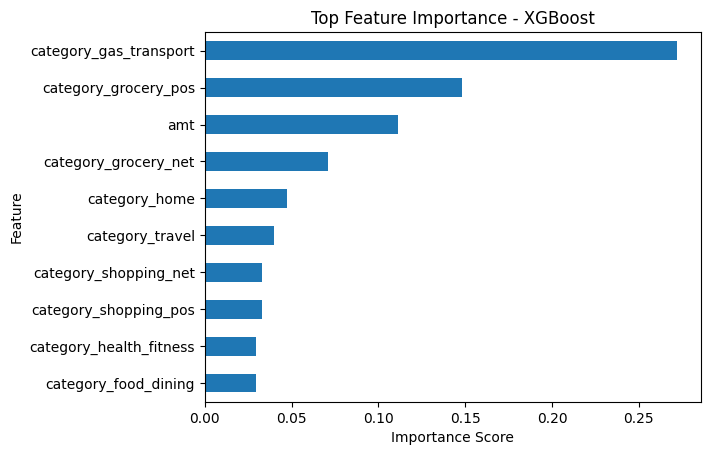

In [ ]:
# Define features and target
features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'category', 'state']
X = df[features]
y = df['is_fraud'].astype(int)  # Convert target to integer

# Encode categorical features
X = pd.get_dummies(X, columns=['category', 'state'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("XGBoost Model:")
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.2, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Dapatkan skor pentingnya fitur dari model XGBRegressor yang telah dilatih
feature_importance = xgb_model.feature_importances_  # Changed from xgb_reg to xgb_model
feature_names = X.columns

# Buat DataFrame untuk pentingnya fitur dan urutkan
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Tampilkan DataFrame pentingnya fitur
print("Feature Importance:\n", feature_importance_df)

# Plot 10 fitur terpenting
plt.figure(figsize=(8, 6))
feature_importance_df.set_index('Feature').head(10).plot(kind='barh', legend=False)
plt.title("Top Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


**Variabel yang Digunakan**:
Kode ini menggunakan variabel berikut dari dataset:
- `amt`: jumlah transaksi
- `lat` dan `long`: lintang dan bujur lokasi pemegang kartu
- `city_pop`: populasi kota pemegang kartu
- `merch_lat` dan `merch_long`: lintang dan bujur lokasi pedagang
- `category` dan `state`: kategori dan negara bagian transaksi, yang diencode  menjadi variabel dummy yaitu T/F
> Kami memilih fitur-fitur `'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long'` karena fitur-fitur ini memiliki nilai numerik yang potensial mempengaruhi keakuratan prediksi. Fitur-fitur ini berkaitan langsung dengan aspek kuantitatif dan geografis dari transaksi, yang bisa membantu dalam mengidentifikasi pola yang terkait dengan penipuan.
Kami juga menambahkan `'category'` karena kategori transaksi mungkin mempengaruhi kemungkinan terjadinya penipuan. Selain itu, kami memilih `'state'` (lokasi) untuk mempertimbangkan faktor geografis yang bisa mempengaruhi risiko penipuan, terutama jika pola transaksi terjadi di lokasi yang jauh dari biasanya. Fitur lain seperti `'merchant', 'city', 'job', 'dob', 'transnum'` tidak dimasukkan karena dianggap tidak memenuhi kriteria yang relevan dalam mendeteksi potensi penipuan.
   
**Metode Klasifikasi**:
Kode ini menggunakan model **XGBoost Classifier** karena:
- Dalam kasus penipuan, jumlah transaksi yang sah jauh lebih banyak daripada yang curang. XGBoost lebih cocok untuk hal tersebut.
- Fitur regularisasi dalam XGBoost membantu mencegah overfitting, yang penting untuk memastikan model tidak hanya belajar dari noise dalam data.
- XGBoost memungkinkan analisis dengan cepat dan efisien.
   
**Pembagian Data**:
- Data dibagi menggunakan metode **train_test_split** dengan **stratified sampling** untuk menjaga proporsi kelas penipuan dan non-penipuan dalam data pelatihan dan pengujian.
- Data dibagi menjadi **80% untuk pelatihan** dan **20% untuk pengujian**.

**B. Seberapa bagus model klasifikasi Anda?**

XGBoost Accuracy: 0.9746263468891206
Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2521
           1       0.93      0.86      0.89       356

    accuracy                           0.97      2877
   macro avg       0.95      0.93      0.94      2877
weighted avg       0.97      0.97      0.97      2877

Total differences (XGBoost): 73


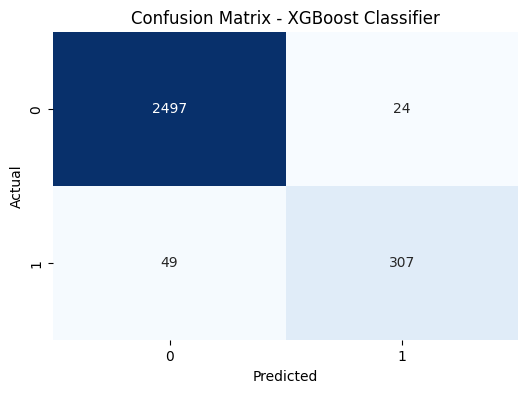

In [ ]:
# 1. XGBoost Model

# Accuracy and Classification Report untuk XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)
print("Classification Report - XGBoost:\n", classification_report(y_test, y_pred_xgb))

# komparasi aktual vs predicted untuk XGBoost
compare_y_xgb = pd.DataFrame(y_test).reset_index(drop=True)
compare_xgb = pd.DataFrame(y_pred_xgb, columns=['is_fraud'])
compare_final_xgb = compare_y_xgb.compare(compare_xgb)
differences_xgb = (compare_y_xgb != compare_xgb).sum().sum()
print("Total differences (XGBoost):", differences_xgb)

# Confusion Matrix - XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Berdasarkan matriks perbandingan hasil prediksi dan aktual, terdapat:

1. **307 transaksi** yang diprediksi sebagai **penipuan dan memang terbukti** penipuan.
2. **24 transaksi** yang diprediksi sebagai **penipuan tetapi sebenarnya bukan** penipuan.
3. **2.497 transaksi** yang diprediksi **bukan penipuan dan memang bukan** penipuan.
4. **49 transaksi** yang diprediksi **bukan penipuan tetapi sebenarnya merupakan penipuan**.
>Dengan tingkat kesalahan yang relatif kecil, model ini telah menunjukkan kinerja yang baik untuk diimplementasikan. Namun, dari hasil tersebut, prediksi "bukan penipuan" yang sebenarnya adalah penipuan lebih berisiko daripada kesalahan sebaliknya karena penipuan tersebut bisa terlewatkan. Berikut adalah solusi yang kami usulkan untuk mengatasi kekeliruan tersebut: Menurunkan threshold prediksi penipuan agar model lebih sensitif, sehingga mengurangi kemungkinan transaksi penipuan yang terlewatkan, Menambah fitur-fitur atau data yang relevan (contoh: riwayat perilaku pelanggan atau data transaksi rinci) untuk memperkaya informasi bagi model dalam mendeteksi pola penipuan.



**C. Jelaskan bagaimana Anda akan menggunakan model yang baru dibuat ini untuk
 membantu pekerja frontline mengambil keputusan berdasarkan prediksi yang
 dibuat oleh model tersebut.**


  - **Deteksi Penipuan Otomatis**: Model ini dapat digunakan untuk memberikan peringatan kepada pekerja frontline tentang transaksi yang mencurigakan (prediksi penipuan).
  - **Intervensi Cepat**: Berdasarkan hasil prediksi, pekerja dapat memeriksa transaksi lebih lanjut atau menghubungi pelanggan untuk konfirmasi, sehingga mencegah kemungkinan penipuan sebelum terjadi kerugian.
  - **Efisiensi Kerja**: Dengan klasifikasi yang otomatis, pekerja dapat fokus pada kasus-kasus yang lebih berisiko tinggi, meningkatkan efisiensi dan efektivitas dalam menangani potensi penipuan.
